# Use case the US Real Estate market :  

You are a consultant for a company that is looking to invest in the US Real Estate market. 

For this task you're given two timeseries: 
- A list of columns with several variables in the US Economy, mostly indexes and rates. (Since there are market indexes, some columns contain open and close prices, for current indexes and rates, you should use "last price") 
- A list of columns with the SyP Case Shiller Index, which is a measurement of the US housing market prices over time.
- There's an auxiliar table with relevant information about each time series, were you can find the description of each variable, alongside its frequency, units quoted and so on.

The expected outcome is an study of the US Real Estate market, suggesting markets, times and strategies for the company to invest in. So the following path is being proposed:  

1. Data Cleaning and Transformation:
    - The data is nowhere near to be clean and ready to be used. You should use your skills to clean, resample, merge, differentiate or apply any other necessary transformation to the data. Feel free to use whatever method you think is best to achieve this goal.
2. Data Understanding and Segmentation:
    - Make and EDA (Exploratory data analysis) of the data, considering facts that happened in the US Real Estate Market and your conclusions over these facts. 
    - Plot and explaing results 
    - Select the most promising real estate markets to work with. (In which markets we should be focused)
    - Select the columns that are relevant to explain the SyP Case Shiller Index return for the chosen market and explain why you chose them. (Use any statistis test if neccesary)
    
3. Utilization of data for business profitability:
    - Create a predictive model to forecast the SyP Case Shiller Index (in the selected location) for the next 2 years (or more)
    - Test the model outputs, assumptions and make the necessary adjustments to make it more accurate.
    - Run tests to check model's accuracy (The test complexity will be assessed too), using stastistical or financial methods which can make sense to solve the problem.  
    - Run the model with the data you have and make a strategy to invest in the US Real Estate Market. (Use whatever tool you think is best to achieve this goal).
    - Plot and explain every result you have.
4. Analysis, recommendations, and contestant's rigor in generating business value:
    - Show your conclusions and recommendations to the company, explaining reasons for your choices and the expected results.
    - Make a business proposal to the company, explaining the strategy you would use to invest in the US Real Estate Market.
5. Communication and presentation skills in delivering results:
    - Present your conclusions for this exercise in a clear and concise way, using the best practices for data visualization and storytelling.

## 0. Install libraries

In [58]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly_express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels as stt
import pmdarima as pmd 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import requests

# 1. Data Cleaning and Transformation

In [2]:
## load data
economic_data = pd.read_excel('data.xlsx', sheet_name='Economic Data',engine='openpyxl')
housing_data = pd.read_excel('data.xlsx', sheet_name='Case Shiller Index', engine='openpyxl')
description = pd.read_excel('data.xlsx', sheet_name='Variable-Description', engine='openpyxl')

### Delete rows and columns without data

In [3]:
## Transformation / cleaning - economics data
### Note: run this code only once to avoid deleting columns with information.
economic_data = economic_data.drop(economic_data.index[0:5])
economic_data = economic_data.drop(economic_data.columns [0:2], axis=1)
column_names_economics =["Dates", "SPX_Open", "SPX_Last", "NDX_Open", "NDX_Last",	"CPI INDX_Open",	"CPI INDX_Last",	"EHUPUS_Open",	"EHUPUS_Last",	"CPFTDIV_Open",	"CPFTDIV_Last",	"CPWG67NS_Open",	"CPWG67NS_Last",	"FDIDFDB_Open",	"FDIDFDB_Last",	"FDIDFDMO_Open",	"FDIDFDMO_Last",	"HIREPRNR_Open",	"HIREPRNR_Last",	"HIREGONR_Open",	"HIREGONR_Last",	"SFFRNEWS_Open",	"SFFRNEWS_Last",	"USHBTRAF_Open",	"USHBTRAF_Last",	"FDIITOTL_Open",	"FDIITOTL_Last",	"VISTTRUS_Open",	"VISTTRUS_Last",	"VELOM2_Open",	"VELOM2_Last",	"ACMTRY10_Open",	"ACMTRY10_Last",	"MBACTTL_Open", "MBACTTL_Last",	"NMCMFR15_Open",	"NMCMFR15_Last",	"NMCMFR30_Open",	"NMCMFR30_Last"]
economic_data.columns = column_names_economics

# Delete opening column _df Economic
economic_data = economic_data.drop(columns=["SPX_Open","NDX_Open","CPI INDX_Open","EHUPUS_Open","CPFTDIV_Open","CPWG67NS_Open","FDIDFDB_Open","FDIDFDMO_Open","HIREPRNR_Open","HIREGONR_Open", "SFFRNEWS_Open","USHBTRAF_Open","FDIITOTL_Open","VISTTRUS_Open","VELOM2_Open","ACMTRY10_Open","MBACTTL_Open","NMCMFR15_Open","NMCMFR30_Open"])

## Transformation / cleaning - housing data
housing_data = housing_data.drop(housing_data.index[0:6])
housing_data = housing_data.drop(housing_data.columns [0], axis=1)
column_names_housing =["Dates", "ATLANTA", "BOSTON", "ATLANTA2", "BOSTON2",	"CHARLOT","CHICAGO","CLEVELAN",	"DALLAS","DENVER",	"DETROIT", "LA", "LVEGAS","MIAMI","NY","PHX","POR","SDIEGO","SEA","SSF","TMP","WDC"]
housing_data.columns = column_names_housing

# Delete repeated column
housing_data = housing_data.drop(columns=['ATLANTA2', 'BOSTON2'])

## Transformation / cleaning - description data
description = description.drop(description.columns [0], axis=1)
description = description.drop(description.index[0:1])
column_names_description =["Sheet",	"Columns",	"Brief_Name",	"Currency",	"Units",	"Quote_Units_US",	"Date_Last_Value",	"Last Value",	"Frequence",	"Index_Type",	"Description"]
description.columns = column_names_description

# Count the number of missing values in each variable
missing_values_economic = economic_data.isnull().sum()
missing_values_housin = housing_data.isnull().sum()

In [4]:
# Print the results missing values economic
print(missing_values_economic)

Dates               0
SPX_Last          304
NDX_Last          304
CPI INDX_Last    8476
EHUPUS_Last      8668
CPFTDIV_Last     8668
CPWG67NS_Last    8476
FDIDFDB_Last     8642
FDIDFDMO_Last    8643
HIREPRNR_Last    8566
HIREGONR_Last    8566
SFFRNEWS_Last       4
USHBTRAF_Last    8475
FDIITOTL_Last    8679
VISTTRUS_Last    8525
VELOM2_Last      8668
ACMTRY10_Last     384
MBACTTL_Last     8643
NMCMFR15_Last    7072
NMCMFR30_Last    7012
dtype: int64


In [5]:
# Print the results missing values economic
print(missing_values_housin)

Dates          0
ATLANTA     8349
BOSTON      8349
CHARLOT     8349
CHICAGO     8349
CLEVELAN    8349
DALLAS      8426
DENVER      8349
DETROIT     8350
LA          8349
LVEGAS      8349
MIAMI       8349
NY          8349
PHX         8349
POR         8349
SDIEGO      8349
SEA         8349
SSF         8349
TMP         8349
WDC         8349
dtype: int64


### Missing data: Identify the columns that contain all null data and create a new data frame to only display a table with data

Not all columns have the same number of records.

In [6]:
# Filter the columns with less than 500 null values - data economic
columns_with_less_than_500_nulls = economic_data.columns[economic_data.isnull().sum() < 500]
# Extract the columns with less than 500 null values
Economic_filtered = economic_data[columns_with_less_than_500_nulls]
# Filter the columns with less  values - data economic
Economic_filtered.dropna(inplace=True)
Economic_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 5 to 8764
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dates          8367 non-null   object
 1   SPX_Last       8367 non-null   object
 2   NDX_Last       8367 non-null   object
 3   SFFRNEWS_Last  8367 non-null   object
 4   ACMTRY10_Last  8367 non-null   object
dtypes: object(5)
memory usage: 392.2+ KB


C:\Users\Andres\AppData\Local\Temp\ipykernel_8644\97202086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Economic_filtered.dropna(inplace=True)


In [7]:
# Filter the columns - data housing.
housing_data.dropna(inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 2376 to 8594
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Dates     207 non-null    object
 1   ATLANTA   207 non-null    object
 2   BOSTON    207 non-null    object
 3   CHARLOT   207 non-null    object
 4   CHICAGO   207 non-null    object
 5   CLEVELAN  207 non-null    object
 6   DALLAS    207 non-null    object
 7   DENVER    207 non-null    object
 8   DETROIT   207 non-null    object
 9   LA        207 non-null    object
 10  LVEGAS    207 non-null    object
 11  MIAMI     207 non-null    object
 12  NY        207 non-null    object
 13  PHX       207 non-null    object
 14  POR       207 non-null    object
 15  SDIEGO    207 non-null    object
 16  SEA       207 non-null    object
 17  SSF       207 non-null    object
 18  TMP       207 non-null    object
 19  WDC       207 non-null    object
dtypes: object(20)
memory usage: 34.0+ KB


In [8]:
# Transform variables from object type to numeric data type - df_economic
Economic_filtered = Economic_filtered.astype({'SPX_Last': 'float64',
                                              'NDX_Last': 'float64',
                                              'SFFRNEWS_Last': 'float64',
                                              'ACMTRY10_Last': 'float64'})

# Transform variables from object type to numeric data type df_housing
housing_filtered = housing_data.astype({"ATLANTA" : 'float64',
                                        "BOSTON" : 'float64',
                                        "CHARLOT" : 'float64',
                                        "CHICAGO" : 'float64',
                                        "CLEVELAN" : 'float64',
                                        "DALLAS" : 'float64',
                                        "DENVER" : 'float64',
                                        "DETROIT" : 'float64',
                                        "LA" : 'float64',
                                        "LVEGAS" : 'float64',
                                        "MIAMI" : 'float64',
                                        "NY" : 'float64',
                                        "PHX" : 'float64',
                                        "POR": 'float64',
                                        "SDIEGO" : 'float64',
                                        "SEA" : 'float64',
                                        "SSF" : 'float64',
                                        "TMP" : 'float64',
                                        "WDC": 'float64'})

# 2. Data Understanding and Segmentation (EDA)

### 2.1. Data Understanding

### Observations Economic:
* The economic database contains 8,367 observations distributed in 5 variables.
* The stock market index on average is 1612 points in the performance of 500 large companies, the maximum is located in the closing SPX with 4894 points.
* non-financial market shares on average are at 3605 points
* The federal reserves of the Bank of San Francisco have a minimum of -0.66% and a maximum of 0.45%.

In [12]:
print(Economic_filtered.shape)
# Print the summary statistics of the numeric columns / data economic
summary_table_economic= Economic_filtered.describe()
summary_table_economic

(8367, 5)


,SPX_Last,NDX_Last,SFFRNEWS_Last,ACMTRY10_Last
count,8367.000000,8367.000000,8367.000000,8367.000000
mean,1612.263551,3605.584261,0.031866,3.201237
std,1095.352525,4006.420524,0.192974,1.358136
min,295.460000,165.190000,-0.669441,0.933400
25%,919.575000,1116.890000,-0.091598,1.980500
50%,1279.360000,1893.050000,0.046867,3.168100
75%,2066.605000,4417.960000,0.183059,4.438750
max,4894.160000,17516.990000,0.451346,6.295300


### Observations Housing:
* The economic database contains 207 observations distributed in 20 variables.
* On average, the home resale price in Detroit is the lowest with 112%, the city with the highest home resale average is Los Angeles with 232%.

In [14]:
print(housing_filtered.shape)
# Print the summary statistics of the numeric columns
summary_table_housing= housing_filtered.describe()
summary_table_housing

(207, 20)


,ATLANTA,BOSTON,CHARLOT,CHICAGO,CLEVELAN,DALLAS,DENVER,DETROIT,LA,LVEGAS,MIAMI,NY,PHX,POR,SDIEGO,SEA,SSF,TMP,WDC
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,134.108454,185.938889,141.420580,139.908164,118.969565,153.327440,169.932464,112.457005,232.247198,165.865652,212.008841,186.725266,170.158986,183.829517,220.783043,192.918889,205.042560,190.567923,207.732512
std,36.800106,51.759154,43.409445,22.984656,21.054855,54.865266,61.523173,27.924523,81.286285,58.038427,79.331641,41.248783,64.729767,65.076017,78.775122,78.817480,72.089156,71.227473,50.295436
min,83.270000,100.000000,100.000000,100.000000,94.220000,100.000000,100.000000,65.180000,100.000000,89.880000,100.000000,100.000000,100.000000,100.590000,100.000000,100.000000,100.000000,100.000000,100.000000
25%,111.090000,153.805000,113.430000,122.690000,105.750000,115.860000,126.960000,95.190000,169.690000,113.015000,147.370000,166.165000,115.775000,134.985000,157.795000,137.230000,141.805000,136.395000,180.640000
50%,124.610000,172.180000,126.480000,136.540000,112.410000,123.210000,137.420000,111.660000,225.110000,153.090000,201.370000,183.300000,154.820000,167.330000,214.590000,169.940000,195.490000,174.940000,209.350000
75%,140.795000,205.320000,151.670000,153.720000,122.575000,180.935000,204.055000,124.320000,273.825000,207.995000,248.870000,204.340000,204.305000,225.835000,250.065000,232.855000,252.420000,220.890000,235.210000
max,241.910000,323.530000,271.050000,198.470000,184.160000,307.810000,332.280000,182.640000,423.100000,299.910000,428.200000,294.230000,343.540000,337.690000,427.800000,414.010000,393.830000,383.220000,314.150000


### 2.2. Plot results and write facts

### Observations Economic:
* The evolution of the SPX and NDX variables is observed, which increased significantly in the years from 2020 to 2024.
* The last SFFNEWS and ACMTRY10 variables remain constant over time.

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


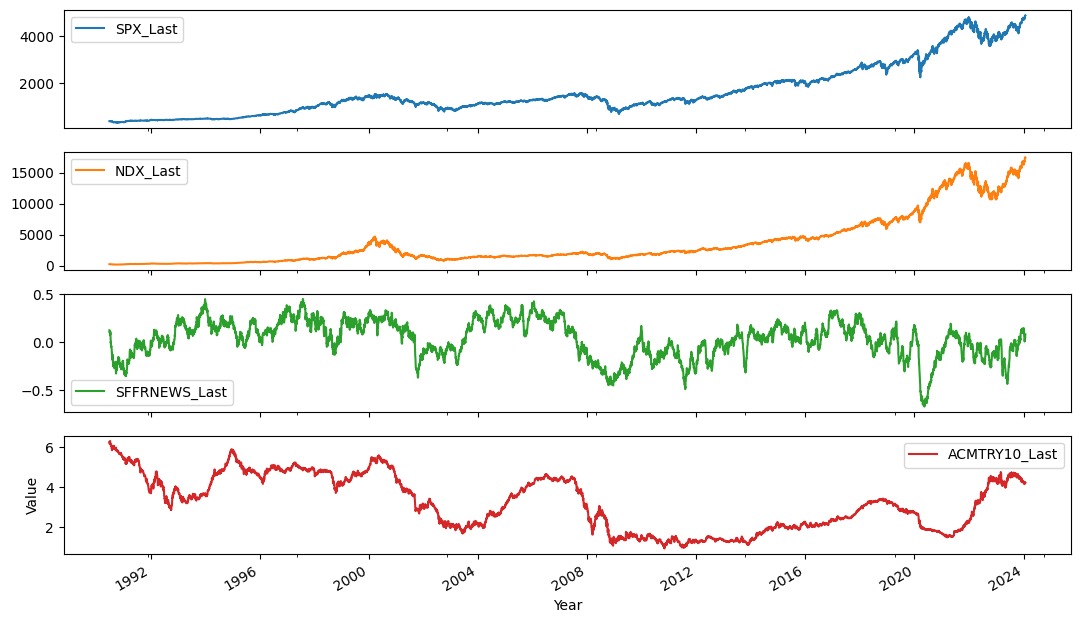

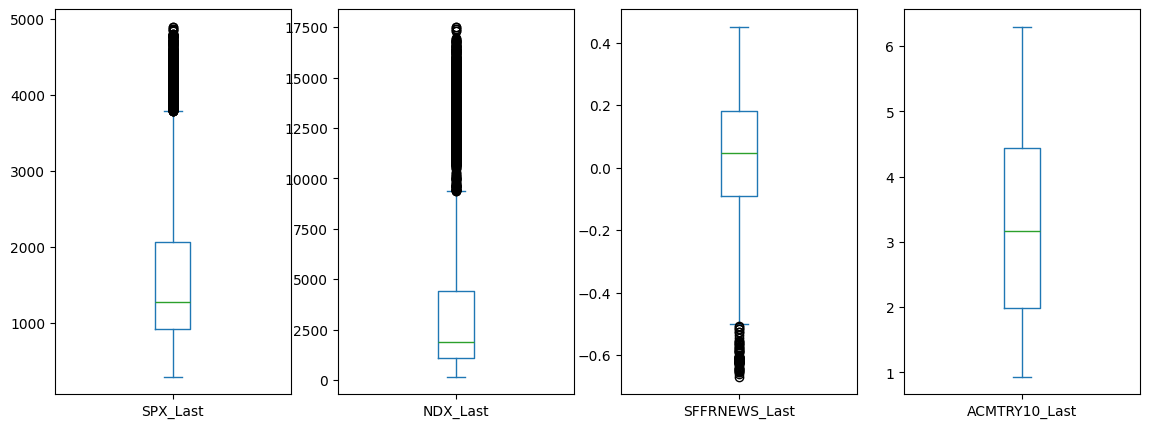

In [17]:
Economic_filtered.plot(x='Dates', subplots=True,figsize=(13,8))
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()
# Dispersion diagram Economic
Economic_filtered.plot(kind='box', subplots=True, layout=(1,4), figsize=(14,5))
plt.show ()

In the database there are atypical data in the economic variables, however the variable ACMTRY10_LAST does not contain outliers.

### Observations Housing:
* The period between 2004 and 2008 increased the value of real estate resale in the US, then generated a decrease until 2012.
* Los valores de reventa de vivienda muestran valor altos en el ultimo año 

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


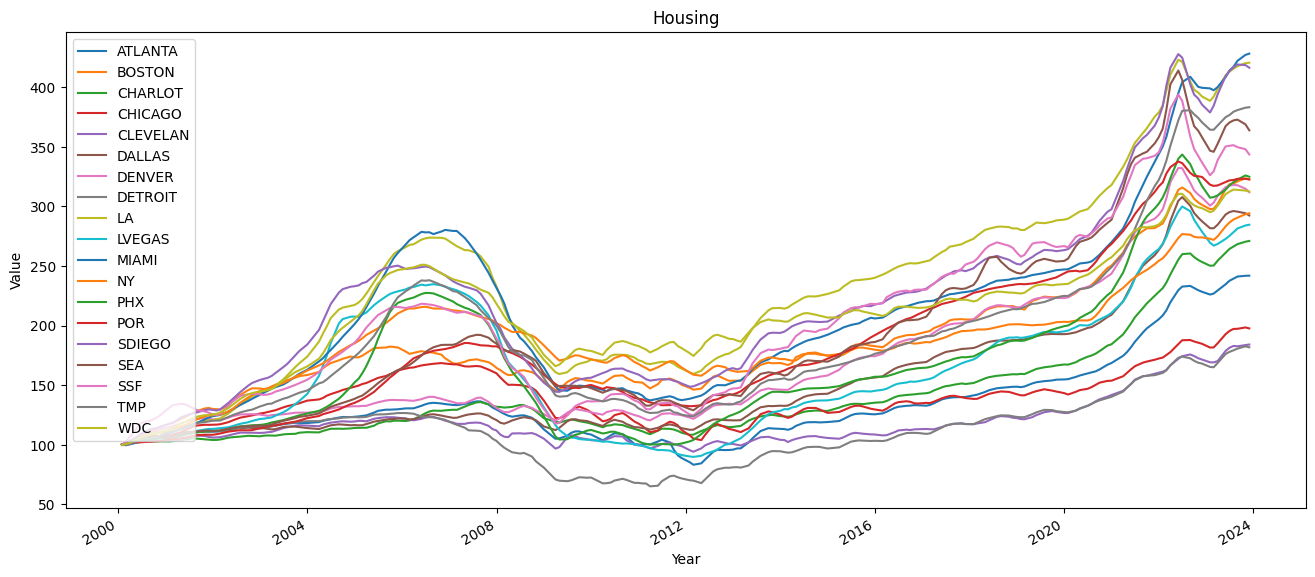

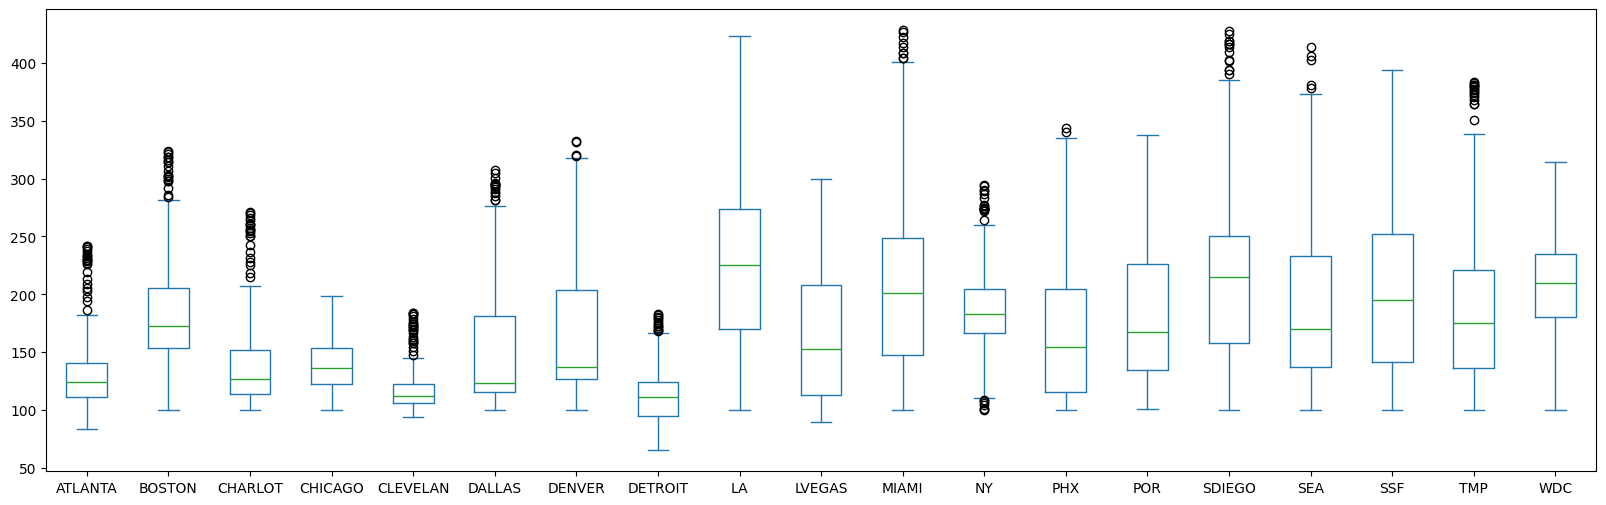

In [20]:
housing_filtered.plot(x='Dates',figsize=(16,7))
plt.title('Housing')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()
# Dispersion diagram Housing
housing_filtered.plot(kind='box', subplots=False, layout=(4,5), figsize=(20,6))
plt.show()

In the database there are atypical data in the variables that identify the prices of the US real estate market, however the cities of Chicago, LA, Las Vegas, Portlan and WDC do not contain atypical values ​​and show disruptions in the normal data

### 2.3. Select the most promising real estate markets to work with


As seen in the following graph, the most promising markets are Charlor, Cleveland, Dallas and Denver, they no longer show declines over time, they are always growing constantly.

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


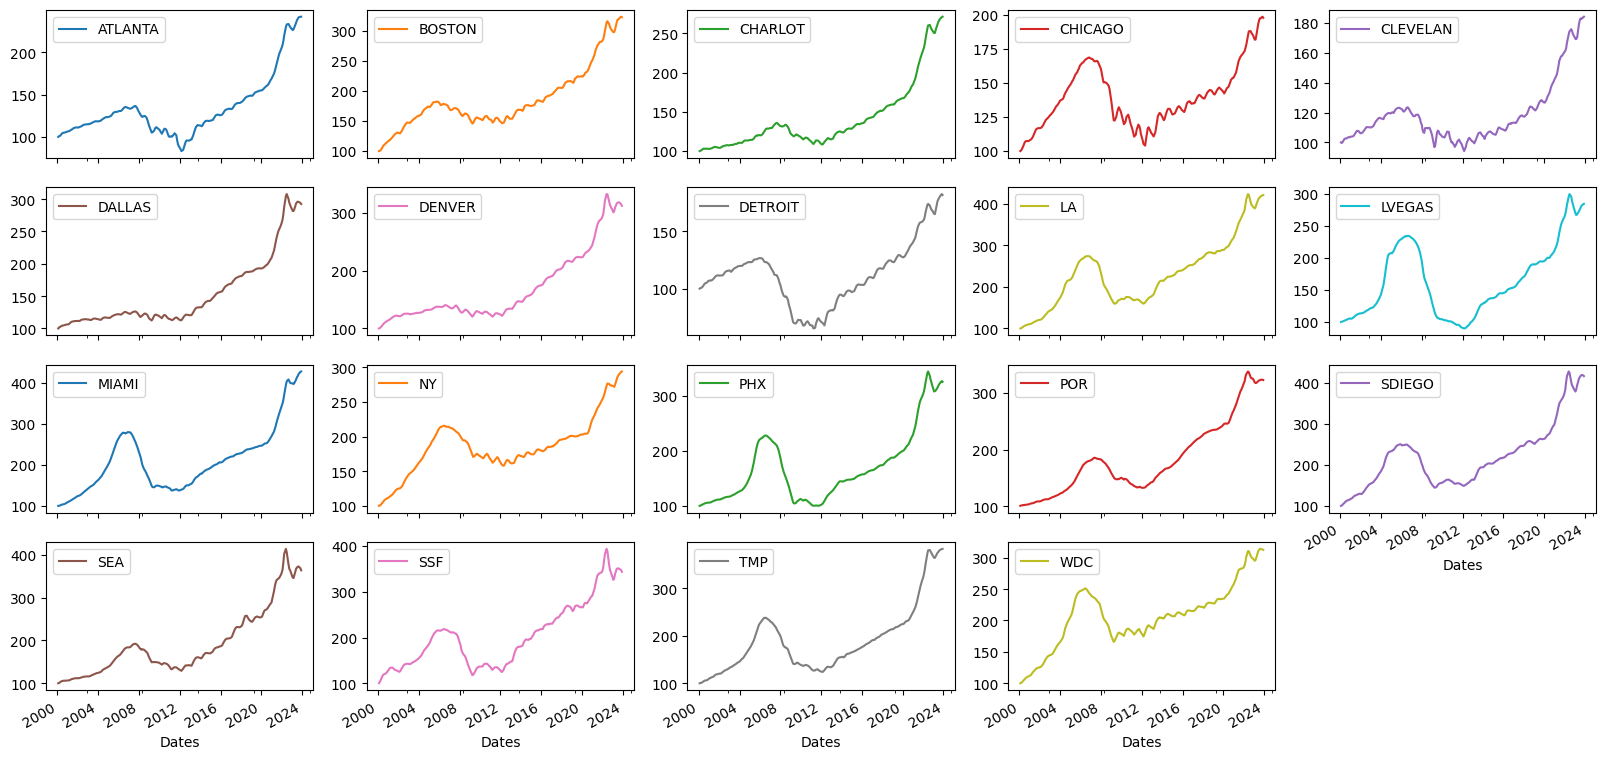

In [21]:
housing_filtered.set_index('Dates', inplace=True)
# Dispersion diagram Housing
housing_filtered.plot(subplots=True, layout=(4,5), figsize=(20,10))
plt.show()

### 2.4. Select the relevant economic variables to explain the SyP Case Shiller Index behavior for the chosen city/es and explain why you chose them.

* Correlation Matrix

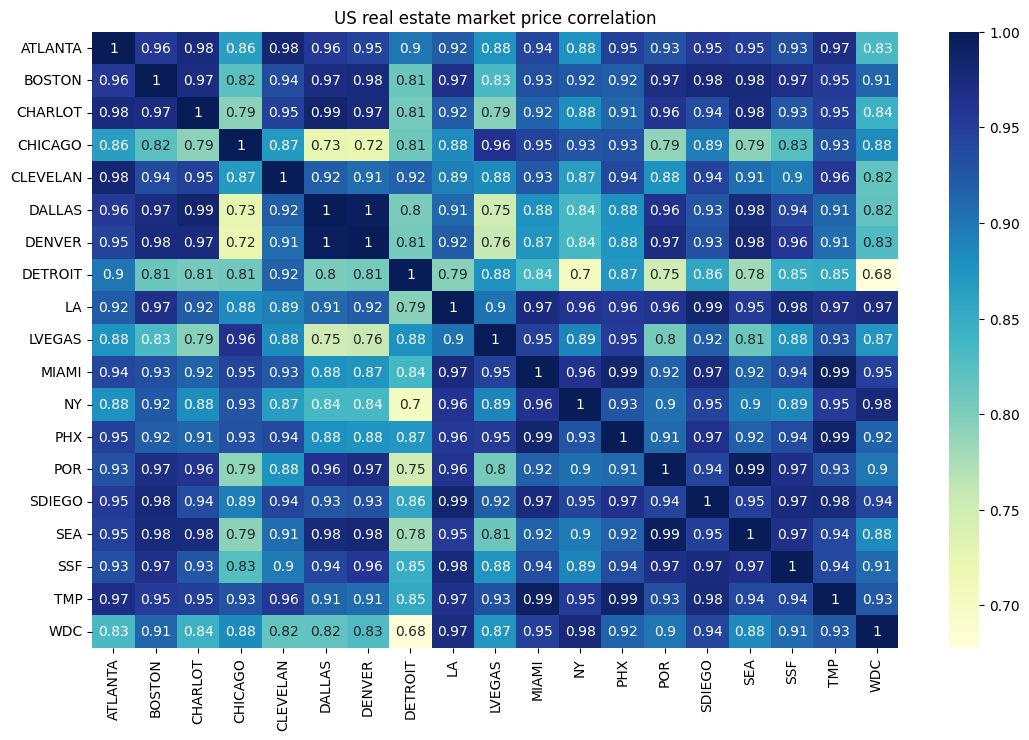

In [22]:
correlacion_husing_matrx = housing_filtered.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(correlacion_husing_matrx, annot=True, cmap='YlGnBu')
plt.title('US real estate market price correlation')
plt.show()

The strongest correlations are seen for the city of:
* LA    - MIAMI    : 0.97
* LA    - SAN DIEGO: 0.99
* MIAMI - SAN DIEGO: 0.99


Create two risk groups, which the company is willing to assume in the investment.
The first group is low risk, which contains the 3 cities with the lowest average variance, standard deviation, and S&P index.
The second group corresponds to high risk with higher variance, standard deviation and average S&P index.

### Low risk

In [23]:
print("varianza.....CLEVELAN: ", np.var(housing_filtered['CLEVELAN'])),print("Desv.Est.....CLEVELAN: ", np.std(housing_filtered['CLEVELAN'])),print("Mean.........CLEVELAN: ", np.mean(housing_filtered['CLEVELAN'])),print("varianza......CHICAGO: ", np.var(housing_filtered['CHICAGO'])),print("Desv.Est......CHICAGO: ", np.std(housing_filtered['CHICAGO'])),print("Mean..........CHICAGO: ", np.mean(housing_filtered['CHICAGO'])),print("varianza......DETROIT: ", np.var(housing_filtered['DETROIT'])),print("Desv.Est......DETROIT: ", np.std(housing_filtered['DETROIT'])),print("Mean..........DETROIT: ", np.mean(housing_filtered['DETROIT']))
print("____Citys: CLEVELAN, CHICAGO AND DETROIT____")

varianza.....CLEVELAN:  441.16534135685777
Desv.Est.....CLEVELAN:  21.003936330051513
Mean.........CLEVELAN:  118.9695652173913
varianza......CHICAGO:  525.7422497701231
Desv.Est......CHICAGO:  22.929069971765603
Mean..........CHICAGO:  139.90816425120772
varianza......DETROIT:  776.011938855049
Desv.Est......DETROIT:  27.856990843503702
Mean..........DETROIT:  112.45700483091787
____Citys: CLEVELAN, CHICAGO AND DETROIT____


### High risk

In [24]:
print("varianza......LA: ", np.var(housing_filtered['LA'])), print("Desv. Est.....LA: ", np.std(housing_filtered['LA'])), print("Mean..........LA: ", np.mean(housing_filtered['LA'])), print("varianza...MIAMI: ", np.var(housing_filtered['MIAMI'])), print("Desv Est...MIAMI: ", np.std(housing_filtered['MIAMI'])), print("Mean.......MIAMI: ", np.mean(housing_filtered['MIAMI'])), print("varianza..SDIEGO: ", np.var(housing_filtered['SDIEGO'])), print("Desv.Est..SDIEGO: ", np.std(housing_filtered['SDIEGO'])), print("Mean......SDIEGO: ", np.mean(housing_filtered['SDIEGO']))
print("______Citys: LA, MIAMI AND SDIEGO______")

varianza......LA:  6575.540108091203
Desv. Est.....LA:  81.08970408190675
Mean..........LA:  232.24719806763284
varianza...MIAMI:  6263.105854694392
Desv Est...MIAMI:  79.13978679965213
Mean.......MIAMI:  212.00884057971015
varianza..SDIEGO:  6175.5414636841
Desv.Est..SDIEGO:  78.5846134029054
Mean......SDIEGO:  220.78304347826088
______Citys: LA, MIAMI AND SDIEGO______


The correlations are strong for these cities with low risk:
* CLEVELANT - CHICAGO: 0.87
* CLEVELANT - DETROIT: 0.92
* DETROIT -  CHICAGO: 0.81

# 3. Utilization of data for business profitability

### 3.1. Create a predictive model to forecast the SyP Case Shiller Index (in the selected location) for the next 2 years (or more)

In [25]:
# create a new data frame with the value to be predicted:
df_LA= housing_filtered[['LA']]

Year_LA = df_LA.resample(rule='Y').mean()
Year_LA.head(2)

C:\Users\Andres\AppData\Local\Temp\ipykernel_8644\2993900185.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Year_LA = df_LA.resample(rule='Y').mean()


,LA
Dates,
2000-12-31,105.465556
2001-12-31,116.550000


A tendency to grow is observed in the LA graph over time, which would indicate that the series is not stationary.

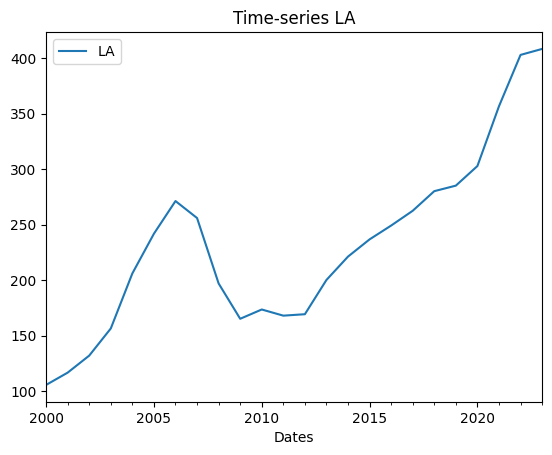

In [26]:
Year_LA.plot().set_title('Time-series LA')
plt.show()

The density graph and the statistical data of the series are analyzed.
There is a group of 23 years starting in the year 2000, with an average of 231 points in the time series.

count     24.000000
mean     231.850220
std       81.735693
min      105.465556
25%      168.902778
50%      228.954167
75%      273.515833
max      408.472222
Name: LA, dtype: float64

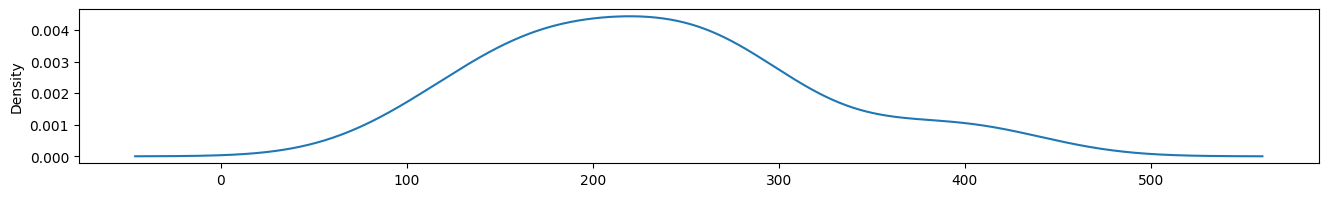

In [27]:
Year_LA["LA"].plot(kind='kde',figsize=(16,2))
Year_LA["LA"].describe()

### Test DICKEY-FULLLER

In [38]:
def Augmented_Dickey_fuller_test_fun(series , column_names):
    print(f'Resultados de la prueba de Dickey-Fuller para la Variable: {column_names}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No LagsUsed', 'Numero de observaciones utilizadas'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'] = value
    print (dfoutput)
    if  dftest [1] <- 0.05:
        print('conclusion:===>')
        print('rechazar la Hipótesis nula')
        print('Los datos son estacionarios')
    else:
        print('conclusion:===>')
        print('No se puede rechazar la Hipótesis nula')
        print('Los datos no son estacionarios')

### Test results

In [39]:
Augmented_Dickey_fuller_test_fun(Year_LA['LA'],'LA')

Resultados de la prueba de Dickey-Fuller para la Variable: LA
Test Statistic                         2.556899
p-value                                0.999066
No LagsUsed                            6.000000
Numero de observaciones utilizadas    17.000000
critical value (%s)                   -2.666984
dtype: float64
conclusion:===>
No se puede rechazar la Hipótesis nula
Los datos no son estacionarios


It is observed that the result of the Dickey Fuller test, the series is not stationary, since the p-vlue is greater than 5%, the difference technique is performed.

In [33]:
df1=Year_LA.copy()
#Take first difference
df1['LA_diff']= Year_LA['LA'].diff()
## remove null data
df1.dropna(inplace=True)
#
df1.head()

,LA,LA_diff
Dates,,
2001-12-31,116.550000,11.084444
2002-12-31,131.910000,15.360000
2003-12-31,156.382222,24.472222
2004-12-31,206.027500,49.645278
2005-12-31,241.833333,35.805833


In [35]:
# Test diff1
Augmented_Dickey_fuller_test_fun(df1['LA_diff'],'LA_diff')

Resultados de la prueba de Dickey-Fuller para la Variable: LA_diff
Test Statistic                        -2.041267
p-value                                0.268777
No LagsUsed                            2.000000
Numero de observaciones utilizadas    20.000000
critical value (%s)                   -2.650713
dtype: float64
conclusion:===>
No se puede rechazar la Hipótesis nula
Los datos no son estacionarios


It is shown that the result of the Dickey Fuller test, the series is not stationary, since the p-vlue is greater than 5%, the difference 2 technique is performed.

In [36]:
df2=Year_LA.copy()
#Take first difference
df2['LA_diff2']= df1['LA_diff'].diff()

## remove null data
df2.dropna(inplace=True)

#
df2.head()

,LA,LA_diff2
Dates,,
2002-12-31,131.910000,4.275556
2003-12-31,156.382222,9.112222
2004-12-31,206.027500,25.173056
2005-12-31,241.833333,-13.839444
2006-12-31,271.288889,-6.350278


In [40]:
## Test diff2
Augmented_Dickey_fuller_test_fun(df2['LA_diff2'],'LA_diff2')

Resultados de la prueba de Dickey-Fuller para la Variable: LA_diff2
Test Statistic                        -3.588108
p-value                                0.005992
No LagsUsed                            9.000000
Numero de observaciones utilizadas    12.000000
critical value (%s)                   -2.714477
dtype: float64
conclusion:===>
No se puede rechazar la Hipótesis nula
Los datos no son estacionarios


The p-value for the diff2 is less than 5%m, which shows that the series is stationary.
The following graph shows that the LA_diff2 series does not have an exponential trend:

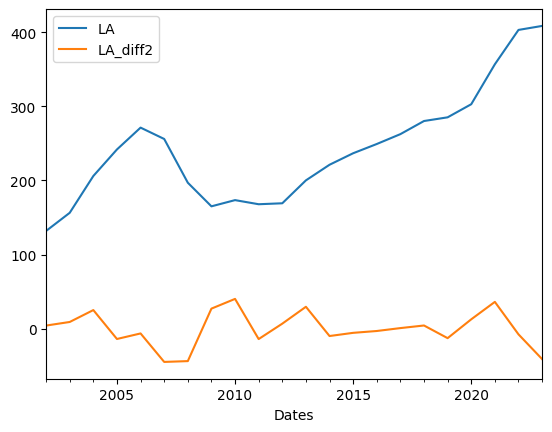

In [42]:
df2.plot()
plt.show()

### Autocorrelation graph

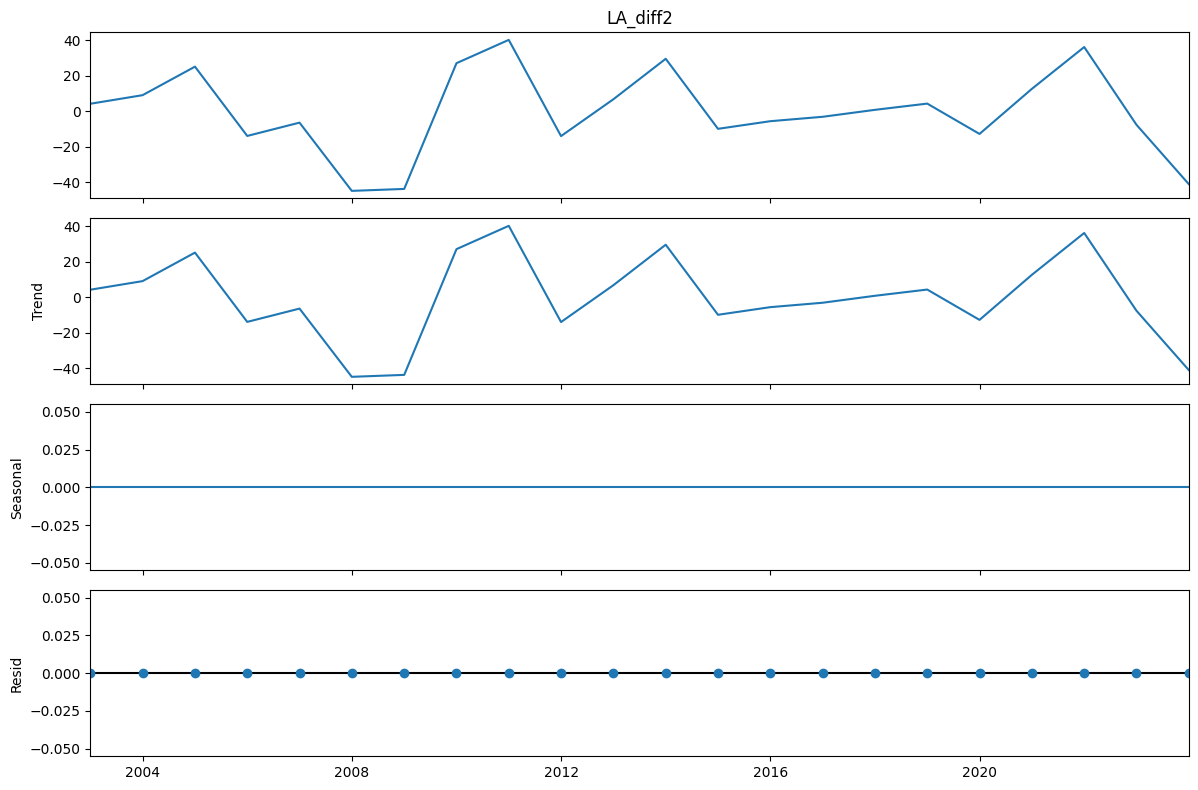

In [43]:
plt.rcParams['figure.figsize'] = (12,8)
a =seasonal_decompose(df2['LA_diff2'], model = "add")
a.plot();

### Modelo Auto-Arima

In [44]:
modelo_auto=auto_arima(df2['LA'], start_p=0,d=1,start_q=0,
                       max_p=4,max_d=2,max_q=4, start_P=0,
                       D=1, start_Q=0, max_P=2,max_D=1,
                       max_Q=2, m=1, seasonal=True,
                       error_action='warn',trace=True,
                       supress_warnings=True,stepwise=True,
                       random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=200.304, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=194.089, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=203.127, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=190.768, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=192.277, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=191.016, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 3.804 seconds
 ARIMA(2,1,0)(0,0,0)[0] intercept


As can be seen, the best ARIMA model chosen by auto_arima() is ARIMA(2,1,0)(0,0,0)[0]

In [45]:
print(modelo_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -91.384
Date:                Wed, 07 Feb 2024   AIC                            190.768
Time:                        16:01:28   BIC                            194.946
Sample:                    12-31-2002   HQIC                           191.674
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8862      5.855      1.176      0.240      -4.589      18.362
ar.L1          0.8686      0.271      3.207      0.001       0.338       1.399
ar.L2         -0.5219      0.161     -3.248      0.0

The graphs highlight that the residuals have a stationary behavior.
The distribution of the data is homogeneous.
and in the correlation model it shows data that is in the confidence range.

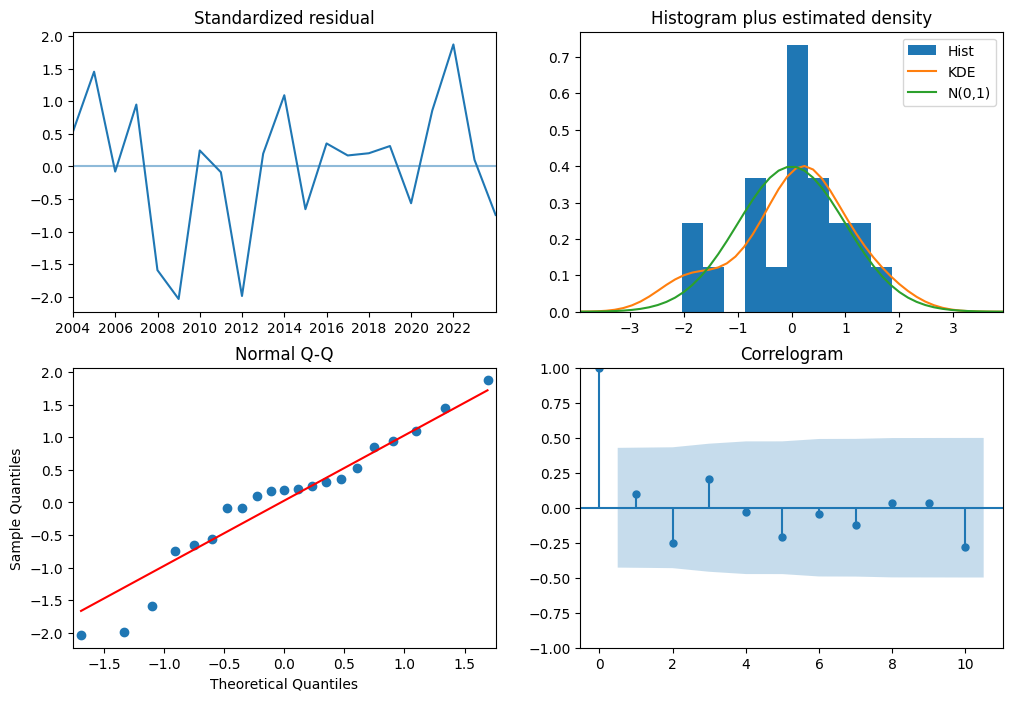

In [47]:
arima_model = SARIMAX(df2['LA'], order=(2,1,0), seasonal_order= (0,0,0,0)).fit()
modelo_auto.plot_diagnostics()
plt.show()

### Prediction for the next 3 years

In [49]:
ARIMA_PRED = arima_model.predict(start = '2024-01-01', end = '2026-12-01', typ="levels").rename('ARIMA PREDICTION')
ARIMA_PRED

2024-12-31    390.381950
2025-12-31    370.411114
2026-12-31    360.422512
Freq: YE-DEC, Name: ARIMA PREDICTION, dtype: float64

### 3.5. Results


According to the results obtained and according to statistical evidence, it is determined that the S&P index for the resale price of homes in Los Angeles and its metropolitan area will not exceed USD 400 on average.

The estimated average behavior for the next three years is:

* 2024 average of 390.
* 2025 average of 370.
* 2026 average of 360

This model adjusts to reality, if you take into account that the last measurement was on 11/30/2023 indicating 420.57 in its last price.

# 4. Analysis, recommendations, and contestant's rigor in generating business value

### 4.1. Conclusions and recommendations to the company

* I consider it to be proof of high knowledge in data management and manipulation.
* This test contains a high degree of knowledge in Python, statistics and business intelligence.
* Starting the test the time was short for most of the analysis and programming codes that must be, but with the extension of time it was decisive to be able to deliver this document.

### 4.2. Business proposal to the company

* Develop models Value at Risk (VAR) , this statistical model allows quantify exposure to market risk.
* Standardize the obtaining of information and organize data warehouses ready for consultation.
* Extract information from official pages of the US market to propose econometric models.
* Perform web scraping to bring the TRM and evaluate the possible losses or gains in local money.

### 4.3 Business proposal:

I recommend the company invest in the United States market initially in cities with low risk:
* Clevelan
* Chicago
* Dretroit

The previous cities do not show significant variances in the proposed model.
It is recommended to use a predictive model for the first six months. If the effectiveness of the model is adjusted, it is recommended to invest in the next three years in high-risk cities:

* Los Angeles
* MIAMI
* San Diego.

It is recommended to take into account the price of the TRM in Colombia, to evaluate the risk:

In [59]:
## Extract historical TRM data from the ANIF website
url = 'https://www.anif.com.co/tipo-indicador/trm/'
USD = pd.read_html(url)
TRM_COLOMBIA = USD[0]


### TRM - last 10 days in Colombia

In [60]:
TRM_COLOMBIA.tail(10)

,Fecha,indicadores_post_status,TRM,indicadores_taxonomy_tipo_indicador
722,2024-01-25,publish,"3.929,95",TRM
723,2024-01-26,publish,"3.932,96",TRM
724,2024-01-29,publish,"3.925,26",TRM
725,2024-01-30,publish,"3.918,93",TRM
726,2024-01-31,publish,"3.925,60",TRM
727,2024-02-01,publish,"3.915,56",TRM
728,2024-02-02,publish,"3.889,05",TRM
729,2024-02-05,publish,"3.928,11",TRM
730,2024-02-06,publish,"3.975,74",TRM
731,2024-02-07,publish,"3.950,57",TRM


# 5. Communication and presentation skills in delivering results


The databases are saved and a report is built on the dashboards with the Power BI tool

In [63]:
# df_Economic
Economic_filtered.to_excel('1_Economic_data.xlsx')
# df_Housin
housing_filtered.to_excel('2_Housin_data.xlsx')
# df_LA
Year_LA.to_excel('3_YearLA_data.xlsx')
#TRM Colombia
TRM_COLOMBIA.to_excel('4_TRM_data.xlsx')


#### Document prepared by: JHON JAIRO DIAZ VASQUEZ
#### PHONE: 3133226689
# THANKS.